## Linear Discriminant Analysis

Problem: Find customers segments (clusters) from a wine dataset, containing several features. To be able to do that, we will reduce the complexity of the dataset, in this case, performing PCA.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset_path = "../../../../datasets/ml_az_course/013_Wine.csv"

df = pd.read_csv(dataset_path)
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
x = df.iloc[: :-1].values
y = df.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train[0][:]

array([1.364e+01, 3.100e+00, 2.560e+00, 1.520e+01, 1.160e+02, 2.700e+00,
       3.030e+00, 1.700e-01, 1.660e+00, 5.100e+00, 9.600e-01, 3.360e+00,
       8.450e+02, 1.000e+00])

### Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(X=x_train)
x_test = sc.transform(X=x_test)

### LDA

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3-1)

# y_train too, because it's a supervided model
x_train = lda.fit_transform(X=x_train, y=y_train)
x_test = lda.transform(X=x_test)

### Training a logistic regression model

In [8]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=42)

### Confusion matrix and metrics 

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[14  0  0]
 [ 1 11  2]
 [ 0  0  8]]


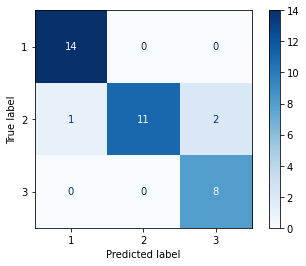

In [10]:
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array([1, 2, 3]))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [11]:
accuracy_score(y_test, y_pred)

0.9166666666666666

Better results than PCA